# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [242]:
# Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [243]:
# Carregar arquivo

datasus = pd. read_csv('sinasc_RO_2019.csv')

In [244]:
# Transformar em Dataframe e imprimí-lo

datasus = pd.DataFrame(datasus)
datasus.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [245]:
# Imprimir dados de APGAR5

datasus['APGAR5'].head(10)

0    10.0
1     9.0
2    10.0
3    10.0
4    10.0
5    10.0
6    10.0
7    10.0
8     9.0
9    10.0
Name: APGAR5, dtype: float64

In [246]:
# Categorizar APGAR5

datasus['CAT_APGAR5'] = datasus['APGAR5'].apply(lambda x: "asfixia grave" if x <= 3 else 
                                                 ("asfixia moderada" if x >= 4 and x < 6 else 
                                                 ("asfixia leve" if x >= 6 and x < 8 else "normal")))

In [247]:
# Imprimir colunas de interesse

datasus[['APGAR5','CAT_APGAR5']].head(3)

,APGAR5,CAT_APGAR5
0,10.0,normal
1,9.0,normal
2,10.0,normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [248]:
# Imprimir colunas de interesse

datasus[['GESTACAO', 'SEXO', 'APGAR5']].head()

,GESTACAO,SEXO,APGAR5
0,37 a 41 semanas,Masculino,10.0
1,37 a 41 semanas,Feminino,9.0
2,37 a 41 semanas,Feminino,10.0
3,37 a 41 semanas,Feminino,10.0
4,37 a 41 semanas,Feminino,10.0


In [249]:
# Imprimir os possíveis grupos de GESTACAO

print(datasus['GESTACAO'].nunique())
print(pd.unique(datasus['GESTACAO']))

6
['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']


O:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



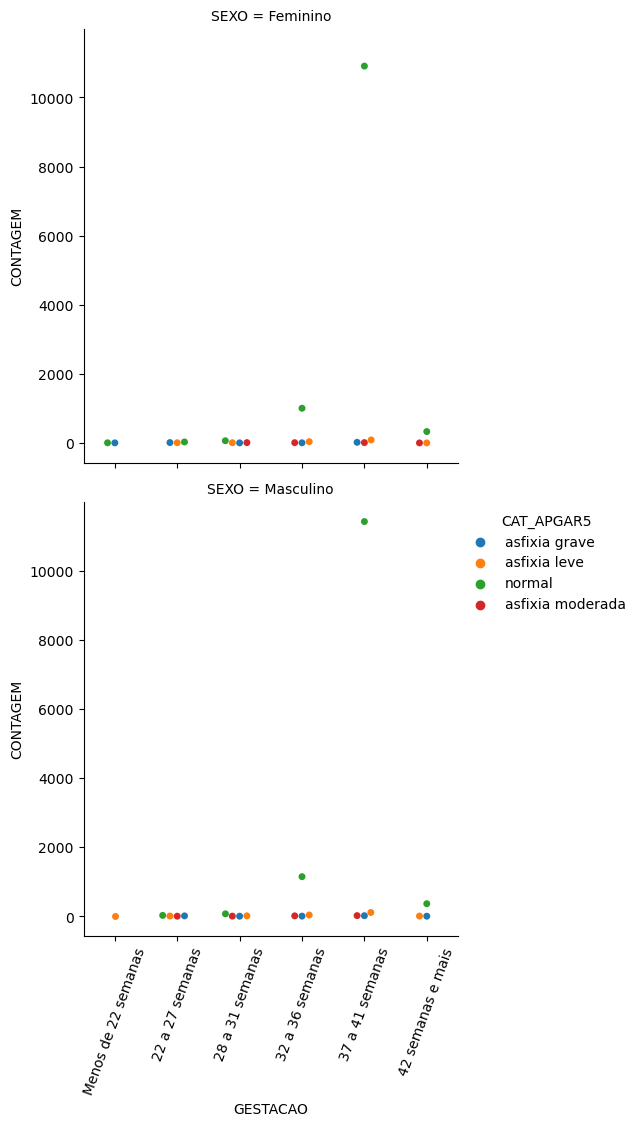

In [250]:
# Calcular a frequência de cada valor de APGAR5 por sexo e grupo de tempo de gestação
freq_apgar5 = datasus.groupby(['SEXO', 'GESTACAO', 'CAT_APGAR5']).size().reset_index(name='CONTAGEM')

#Ordenar GESTACAO
ordem_gestacao = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', 
                  '37 a 41 semanas', '42 semanas e mais']

# Plote o gráfico
sns.catplot(x='GESTACAO', y='CONTAGEM', hue = 'CAT_APGAR5', col='SEXO', data=freq_apgar5, height = 5,
            kind='swarm', col_wrap=1, order = ordem_gestacao)
plt.xticks(rotation=70)
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [251]:
#Ordenar GESTACAO 
ordem_gestacao = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas', 
                  '37 a 41 semanas', '42 semanas e mais']

# Tabela cruzada
freq = pd.crosstab(datasus['GESTACAO'], datasus['CAT_APGAR5'])
freq.index = ordem_gestacao
freq

CAT_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
Menos de 22 semanas,21,12,1,52
22 a 27 semanas,3,18,12,132
28 a 31 semanas,8,73,19,2149
32 a 36 semanas,33,196,28,22332
37 a 41 semanas,1,6,1,692
42 semanas e mais,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [252]:
# Cálculo da soma por linha 
freq.sum(axis = 1)

Menos de 22 semanas       86
22 a 27 semanas          165
28 a 31 semanas         2249
32 a 36 semanas        22589
37 a 41 semanas          700
42 semanas e mais          7
dtype: int64

In [253]:
#Cálculo dos % das linhas
freq = freq.div(freq.sum(axis = 1), axis = 0)
freq

CAT_APGAR5,asfixia grave,asfixia leve,asfixia moderada,normal
Menos de 22 semanas,0.244186,0.139535,0.011628,0.604651
22 a 27 semanas,0.018182,0.109091,0.072727,0.800000
28 a 31 semanas,0.003557,0.032459,0.008448,0.955536
32 a 36 semanas,0.001461,0.008677,0.001240,0.988623
37 a 41 semanas,0.001429,0.008571,0.001429,0.988571
42 semanas e mais,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

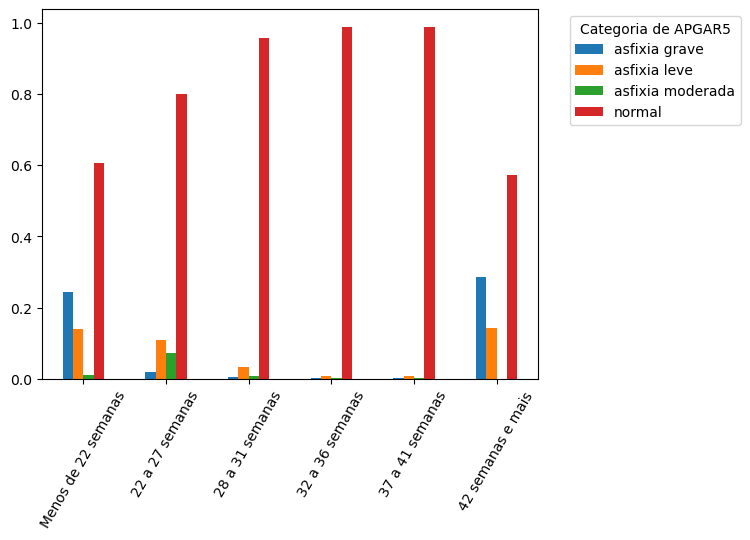

In [254]:
# Plotar o gráfico de barras
freq = freq.plot.bar()

plt.xticks(rotation=60)
plt.legend(title='Categoria de APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Sendo a afirmação dos médicos de que crianças prematuras tem maior probabilidade de nascerem com asfixia verdadeira não deveriam haver tantos casos de crianças nascidas com 42 semanas ou mais com a doença.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

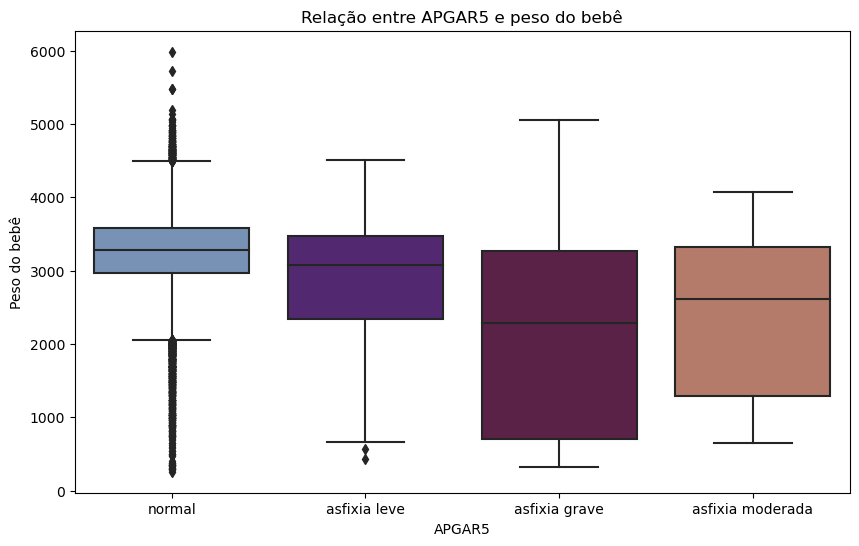

In [275]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.boxplot(data=datasus, x='CAT_APGAR5', y='PESO', palette = "twilight")
plt.ylabel('Peso do bebê')
plt.xlabel('APGAR5')
plt.title('Relação entre APGAR5 e peso do bebê')
plt.show()